# Plot results for different Policies

In [1]:
import pandas as pd

%matplotlib inline  
import matplotlib.pyplot as plt

In [80]:
file_name = '5000_reviews_lemmatized_experiment_nums_10_ninstq_100.csv'

b_per_item = 6

# Budget Allocation Heuristics (Amazon Reviews)

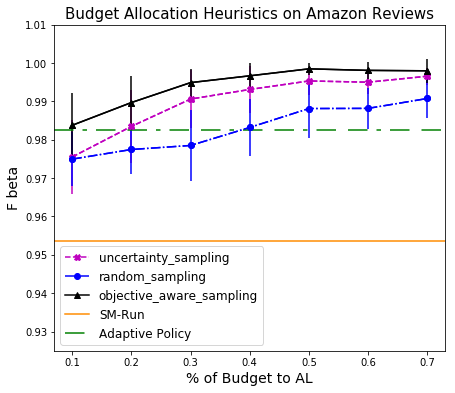

In [99]:
def plot_charts(df, algos, b_per_item):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,6))    
    markers = ['X', 'o', '^']
    x = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
    for alg, c, l, m in zip(algos, ['m', 'b', 'black'], ['--', '-.', '-'], markers):
        x = df.loc[(df['active_learning_strategy'] == alg) & (df['budget_per_item_mean'] == b_per_item) & (df['AL_switch_point_mean'] != -1)]['AL_switch_point_mean'].values 
        y = df.loc[(df['active_learning_strategy'] == alg)  & (df['budget_per_item_mean'] == b_per_item) & (df['AL_switch_point_mean'] != -1)]['f_beta_mean'].values
        y_std = df.loc[(df['active_learning_strategy'] == alg)  & (df['budget_per_item_mean'] == b_per_item) & (df['AL_switch_point_mean'] != -1)]['f_beta_std'].values
        ax.plot(x, y, label=alg, color=c, linestyle=l, marker=m)
        ax.errorbar(x, y, yerr=y_std, marker=m, linestyle=l, color=c)
        ax.set_xlabel('% of Budget to AL', size=14)
        
        ax.set_ylabel('F beta', size=14)
        ax.set_title('Budget Allocation Heuristics on Amazon Reviews', size=15)
        
    #   Drow SM-run line
    ax.axhline(y=df.loc[(df['AL_switch_point_mean'] == 0) & (df['budget_per_item_mean'] == b_per_item)]['f_beta_mean'].values[0], linestyle='-', label='SM-Run', color='darkorange')
    #   Drow Adaptive Policy line
    ax.axhline(y=df.loc[(df['AL_switch_point_mean'] == -1) & (df['budget_per_item_mean'] == b_per_item)]['f_beta_mean'].values[0], label='Adaptive Policy', dashes=[13,6,3,6,13,8], color='g')
    
    ax.legend( fontsize=12)
    plt.ylim((0.925, 1.01))
            
def plot(file_name, b_per_item):
    plot_charts(pd.read_csv('../output/adaptive_machines_and_crowd/{}'.format(file_name)),
                ['uncertainty_sampling', 'random_sampling', 'objective_aware_sampling'], b_per_item)

plot(file_name, b_per_item)

# Classification cost (Amazon Reviews)

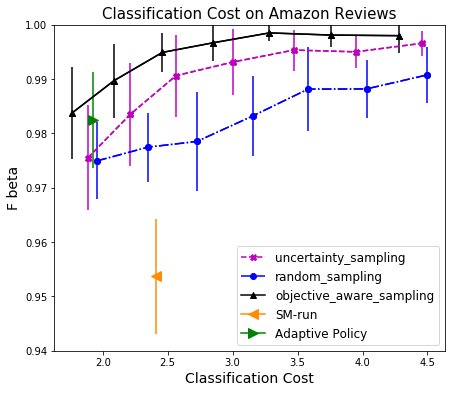

In [98]:
def plot_charts(df, algos, b_per_item):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,6))    
    markers = ['X', 'o', '^']
    for alg, c, l, m in zip(algos, ['m', 'b', 'black'], ['--', '-.', '-'], markers):
        x = df.loc[(df['active_learning_strategy'] == alg) & (df['budget_per_item_mean'] == b_per_item) & (df['AL_switch_point_mean'] != -1)]['budget_spent_per_item_mean'].values 
        y = df.loc[(df['active_learning_strategy'] == alg) & (df['budget_per_item_mean'] == b_per_item) & (df['AL_switch_point_mean'] != -1)]['f_beta_mean'].values
        y_std = df.loc[(df['active_learning_strategy'] == alg) & (df['budget_per_item_mean'] == b_per_item) & (df['AL_switch_point_mean'] != -1)]['f_beta_std'].values
        ax.plot(x, y, label=alg, color=c, linestyle=l, marker=m)
        ax.errorbar(x, y, yerr=y_std, marker=m, linestyle=l, color=c)
        ax.set_xlabel('Classification Cost', size=14)
        ax.set_ylabel('F beta', size=14)
        ax.set_title('Classification Cost on Amazon Reviews', size=15)
    
    # Plot SM-Run dot
    x_smr = df.loc[(df['AL_switch_point_mean'] == 0) & (df['budget_per_item_mean'] == b_per_item)]['budget_spent_per_item_mean'].values
    y_smr = df.loc[(df['AL_switch_point_mean'] == 0) & (df['budget_per_item_mean'] == b_per_item)]['f_beta_mean'].values
    y_smr_std = df.loc[(df['AL_switch_point_mean'] == 0) & (df['budget_per_item_mean'] == b_per_item)]['f_beta_std'].values
    ax.plot(x_smr, y_smr, label='SM-run', color='darkorange', marker='<', markersize=10)
    ax.errorbar(x_smr, y_smr, yerr=y_smr_std, color='darkorange', marker='<', linestyle='-')
    
    # Plot Adaptive Policy
    x_adp = df.loc[(df['AL_switch_point_mean'] == -1) & (df['budget_per_item_mean'] == b_per_item) & (df['active_learning_strategy'] == 'objective_aware_sampling')]['budget_spent_per_item_mean'].values
    y_adp = df.loc[(df['AL_switch_point_mean'] == -1) & (df['budget_per_item_mean'] == b_per_item) & (df['active_learning_strategy'] == 'objective_aware_sampling')]['f_beta_mean'].values
    y_adp_std = df.loc[(df['AL_switch_point_mean'] == -1) & (df['budget_per_item_mean'] == b_per_item) & (df['active_learning_strategy'] == 'objective_aware_sampling')]['f_beta_std'].values
    ax.plot(x_adp, y_adp, label='Adaptive Policy', color='g', marker='>', markersize=10)
    ax.errorbar(x_adp, y_adp, yerr=y_adp_std, color='g', marker='>', linestyle='-')
    ax.legend( fontsize=12)
    plt.ylim((0.94, 1.))
            
def plot(file_name, b_per_item):
    plot_charts(pd.read_csv('../output/adaptive_machines_and_crowd/{}'.format(file_name)),
                ['uncertainty_sampling', 'random_sampling', 'objective_aware_sampling'], b_per_item)

plot(file_name, b_per_item)

# Vary available Budget (Amazon Reviewes)

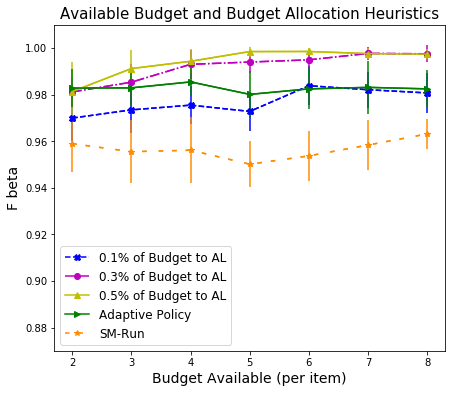

In [110]:
def plot_chart(df, alg, switch_points):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,6))    
    markers = ['X', 'o', '^', '>']
    colors = ['b', 'm', 'y', 'g']
    for switch_point, l, m, c in zip(switch_points, ['--', '-.', '-', '-'], markers, colors):
        x = df.loc[(df['active_learning_strategy'] == alg) & (df['AL_switch_point_mean'] == switch_point)]['budget_per_item_mean'].values[1:] 
        y = df.loc[(df['active_learning_strategy'] == alg)  & (df['AL_switch_point_mean'] == switch_point)]['f_beta_mean'].values[1:] 
        y_std = df.loc[(df['active_learning_strategy'] == alg)  & (df['AL_switch_point_mean'] == switch_point)]['f_beta_std'].values[1:] 
        if switch_point == -1:
            x = df.loc[(df['active_learning_strategy'] == alg) & (df['AL_switch_point_mean'] == switch_point)]['budget_per_item_mean'].values 
            y = df.loc[(df['active_learning_strategy'] == alg)  & (df['AL_switch_point_mean'] == switch_point)]['f_beta_mean'].values
            y_std = df.loc[(df['active_learning_strategy'] == alg)  & (df['AL_switch_point_mean'] == switch_point)]['f_beta_std'].values
            ax.plot(x, y, color=c, linestyle=l, marker=m, label='Adaptive Policy')
        else:
            ax.plot(x, y, color=c, linestyle=l, marker=m, label='{}% of Budget to AL'.format(switch_point))
        ax.errorbar(x, y, yerr=y_std, marker=m, linestyle=l, color=c)
        ax.set_xlabel('Budget Available (per item)', size=14)
        ax.set_ylabel('F beta', size=14)
        ax.set_title('Available Budget and Budget Allocation Heuristics', size=15)
        
#     Drow SM-run line
    x = df.loc[df['AL_switch_point_mean'] == 0.]['budget_per_item_mean'].values[1:] 
    y = df.loc[df['AL_switch_point_mean'] == 0.]['f_beta_mean'].values[1:] 
    y_std = df.loc[df['AL_switch_point_mean'] == 0.]['f_beta_std'].values[1:] 
    ax.plot(x, y, color='darkorange', marker='*', label='SM-Run', dashes=[3,6,3,6,3,8])
    ax.errorbar(x, y, yerr=y_std, marker='*', dashes=[3,6,3,6,3,8], color='darkorange')
    ax.legend( fontsize=12)
    plt.ylim((0.87, 1.01))
            
    
    
df = pd.read_csv('../output/adaptive_machines_and_crowd/{}'.format(file_name))
plot_chart(df, 'objective_aware_sampling', [ 0.1, 0.3, 0.5, -1])

For adaptive policy we collect 500 training samples per predicate as bern in. If within we do not improve Fbeta by 2point wihint (10 iteration == 500 more samples) -> stop